## **Import Libraries dan Dataset**

In [ ]:
!pip install kagglehub==0.3.6

In [ ]:
import kagglehub
matthieugimbert_french_bakery_daily_sales_path = kagglehub.dataset_download('matthieugimbert/french-bakery-daily-sales')

print('Impor Dataset Selesai!')

100%|██████████| 1.94M/1.94M [00:00<00:00, 29.7MB/s]

Extracting files...


Impor Dataset Selesai!


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

In [ ]:
pd.options.display.max_columns = None

pd.options.display.max_rows = None

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!kaggle datasets download -d matthieugimbert/french-bakery-daily-sales -p /content --force
!unzip -n /content/french-bakery-daily-sales.zip -d /content

Dataset URL: https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales
License(s): copyright-authors
100% 1.94M/1.94M [00:00<00:00, 19.5MB/s]
100% 1.94M/1.94M [00:00<00:00, 19.5MB/s]
Archive:  /content/french-bakery-daily-sales.zip
  inflating: /content/Bakery sales.csv  


In [ ]:
import pandas as pd
df = pd.read_csv('Bakery sales.csv')
df.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [ ]:
df.tail(1)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234004,511395,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [ ]:
Total = df.isnull().sum().sort_values(ascending = False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Persentase dari Missing Value'])
missing_data

,Total,Persentase dari Missing Value
Unnamed: 0,0,0.0
date,0,0.0
time,0,0.0
ticket_number,0,0.0
article,0,0.0
Quantity,0,0.0
unit_price,0,0.0


## **Mengatur Data**

In [ ]:
df = df.rename(columns={'date': 'Tanggal',
                        'time' : 'Jam',
                        'ticket_number': 'No_Transaksi',
                        'article': 'Menu',
                        'Quantity': 'Kuantitas',
                        'unit_price': 'Harga/Item'})

df = df.replace(to_replace = {'Kuantitas' : {'.' : ' '},
                              'Harga/Item' : {'€' : ' ' ,
                                              ',' : '.' }},
                regex=True)

df.to_csv('Bakery sales.csv', index=False)

In [ ]:
df = df.astype({'Kuantitas': 'int',
                'Harga/Item': 'float',
                'No_Transaksi': 'int',
                'Menu': 'str',
                'Tanggal' : 'datetime64[ns]'})

df.to_csv('Bakery sales.csv', index=False)

In [ ]:
df['Bulan'] = df['Tanggal'].dt.month_name().str.slice(stop=3)
df.to_csv('Bakery sales.csv', index=False)

In [ ]:
df['Hari'] = df['Tanggal'].dt.day_name().str.slice(stop=3)
df.to_csv('Bakery sales.csv', index=False)

In [ ]:
df.head()

,Unnamed: 0,Tanggal,Jam,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari
0,0,2021-01-02,08:38,150040,BAGUETTE,1,0.90,Jan,Sat
1,1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20,Jan,Sat
2,4,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20,Jan,Sat
3,5,2021-01-02,09:14,150041,PAIN,1,1.15,Jan,Sat
4,8,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20,Jan,Sat


In [ ]:
df = df[(df['Harga/Item'] > 0) & (df['Kuantitas'] > 0)]
df['Pendapatan'] = df['Kuantitas'] * df['Harga/Item']
df.to_csv('Bakery sales.csv', index=False)
df.head()

,Unnamed: 0,Tanggal,Jam,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
0,0,2021-01-02,08:38,150040,BAGUETTE,1,0.90,Jan,Sat,0.90
1,1,2021-01-02,08:38,150040,PAIN AU CHOCOLAT,3,1.20,Jan,Sat,3.60
2,4,2021-01-02,09:14,150041,PAIN AU CHOCOLAT,2,1.20,Jan,Sat,2.40
3,5,2021-01-02,09:14,150041,PAIN,1,1.15,Jan,Sat,1.15
4,8,2021-01-02,09:25,150042,TRADITIONAL BAGUETTE,5,1.20,Jan,Sat,6.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232679 entries, 0 to 234004
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    232679 non-null  int64         
 1   Tanggal       232679 non-null  datetime64[ns]
 2   Jam           232679 non-null  object        
 3   No_Transaksi  232679 non-null  int64         
 4   Menu          232679 non-null  object        
 5   Kuantitas     232679 non-null  int64         
 6   Harga/Item    232679 non-null  float64       
 7   Bulan         232679 non-null  object        
 8   Hari          232679 non-null  object        
 9   Pendapatan    232679 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 19.5+ MB


## **Pembersihan Data**

In [ ]:
df = df[df['Tanggal'] <= '2021-12-31']

In [ ]:
df.tail(1)

,Unnamed: 0,Tanggal,Jam,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
131419,285819,2021-12-31,18:01,227279,CROISSANT AMANDES,1,1.4,Dec,Fri,1.4


In [ ]:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('Jam', axis=1)

In [ ]:
df.duplicated().sum()

758

In [ ]:
duplikat = df[df.duplicated(keep=False)].head(5)
display(duplikat)

,Tanggal,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
34,2021-01-02,150061,COUPE,1,0.15,Jan,Sat,0.15
36,2021-01-02,150061,COUPE,1,0.15,Jan,Sat,0.15
40,2021-01-02,150063,COUPE,1,0.15,Jan,Sat,0.15
43,2021-01-02,150063,COUPE,1,0.15,Jan,Sat,0.15
218,2021-01-02,150154,TRADITIONAL BAGUETTE,1,1.20,Jan,Sat,1.20


In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df['Menu']=='.'].shape[0]

0

In [ ]:
df[(df['Kuantitas'] <= 0)].shape[0]

0

In [ ]:
df[(df['Harga/Item'] <= 0)].shape[0]

0

In [ ]:
df[(df['Pendapatan'] <= 0)].shape[0]

0

In [ ]:
Total = df.isnull().sum().sort_values(ascending = False)

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Persentase dari Missing Value'])
missing_data

,Total,Persentase dari Missing Value
Tanggal,0,0.0
No_Transaksi,0,0.0
Menu,0,0.0
Kuantitas,0,0.0
Harga/Item,0,0.0
Bulan,0,0.0
Hari,0,0.0
Pendapatan,0,0.0


In [ ]:
print(len(df))
df.to_csv('Bakery sales.csv', index=False)

130108


In [ ]:
df.head()

,Tanggal,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
0,2021-01-02,150040,BAGUETTE,1,0.90,Jan,Sat,0.90
1,2021-01-02,150040,PAIN AU CHOCOLAT,3,1.20,Jan,Sat,3.60
2,2021-01-02,150041,PAIN AU CHOCOLAT,2,1.20,Jan,Sat,2.40
3,2021-01-02,150041,PAIN,1,1.15,Jan,Sat,1.15
4,2021-01-02,150042,TRADITIONAL BAGUETTE,5,1.20,Jan,Sat,6.00


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130108 entries, 0 to 131419
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Tanggal       130108 non-null  datetime64[ns]
 1   No_Transaksi  130108 non-null  int64         
 2   Menu          130108 non-null  object        
 3   Kuantitas     130108 non-null  int64         
 4   Harga/Item    130108 non-null  float64       
 5   Bulan         130108 non-null  object        
 6   Hari          130108 non-null  object        
 7   Pendapatan    130108 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 8.9+ MB


## **Eksplorasi Data**

In [ ]:
df['Menu'].nunique()

125

In [ ]:
menu_list = df['Menu'].unique()
menu_list

array(['BAGUETTE', 'PAIN AU CHOCOLAT', 'PAIN', 'TRADITIONAL BAGUETTE',
       'CROISSANT', 'BANETTE', 'BANETTINE', 'SPECIAL BREAD', 'COUPE',
       'SAND JB EMMENTAL', 'KOUIGN AMANN', 'BOULE 200G', 'BOULE 400G',
       'GAL FRANGIPANE 6P', 'CAMPAGNE', 'MOISSON', 'CAFE OU EAU',
       'BRIOCHE', 'CEREAL BAGUETTE', 'SEIGLE', 'COMPLET',
       'GAL FRANGIPANE 4P', 'COOKIE', 'FICELLE', 'PAIN AUX RAISINS',
       'GAL POMME 6P', 'GAL POMME 4P', 'FINANCIER X5', 'VIK BREAD',
       'DIVERS VIENNOISERIE', 'GACHE', 'SANDWICH COMPLET', 'PAIN BANETTE',
       'GRAND FAR BRETON', 'QUIM BREAD', 'SPECIAL BREAD KG',
       'GD KOUIGN AMANN', 'BOULE POLKA', 'DEMI BAGUETTE',
       'CHAUSSON AUX POMMES', 'BAGUETTE GRAINE', 'DIVERS CONFISERIE',
       'SUCETTE', 'DIVERS BOULANGERIE', 'BOISSON 33CL', 'PATES',
       'FORMULE SANDWICH', 'DIVERS SANDWICHS', 'CROISSANT AMANDES',
       'PAIN CHOCO AMANDES', 'SACHET VIENNOISERIE', 'DIVERS PATISSERIE',
       'NANTAIS', 'CHOCOLAT', 'PAIN S/SEL', 'FONDANT CHOC

In [ ]:
int(df['Kuantitas'].sum())

203538

In [ ]:
df['No_Transaksi'].nunique()

75758

In [ ]:
int(np.ceil(df['Pendapatan'].sum()))

305499

## **Statistik**

In [ ]:
from IPython.display import display

df_sorted_descending = df.sort_values(by='Pendapatan', ascending=False)
df_sorted_ascending = df.sort_values(by='Pendapatan', ascending=True)

print("Mengurutkan dari Pendapatan Tertinggi:\n")
display(df_sorted_descending.head())

print("\nMengurutkan dari pendapatan Terendah:\n")
display(df_sorted_ascending.head())

Mengurutkan dari Pendapatan Tertinggi:



,Tanggal,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
50552,2021-06-12,179931,CAFE OU EAU,200,1.0,Jun,Sat,200.0
74999,2021-07-31,194199,GD NANTAIS,11,11.0,Jul,Sat,121.0
25378,2021-04-04,165104,ROYAL 6P,4,18.0,Apr,Sun,72.0
75000,2021-07-31,194199,GD KOUIGN AMANN,9,7.5,Jul,Sat,67.5
115245,2021-10-31,217821,TRADITIONAL BAGUETTE,55,1.2,Oct,Sun,66.0



Mengurutkan dari pendapatan Terendah:



,Tanggal,No_Transaksi,Menu,Kuantitas,Harga/Item,Bulan,Hari,Pendapatan
2971,2021-01-15,151885,DIVERS SANDWICHS,1,0.07,Jan,Fri,0.07
71346,2021-07-25,192047,COUPE,1,0.15,Jul,Sun,0.15
71341,2021-07-25,192044,COUPE,1,0.15,Jul,Sun,0.15
71335,2021-07-25,192041,COUPE,1,0.15,Jul,Sun,0.15
71315,2021-07-25,192035,COUPE,1,0.15,Jul,Sun,0.15


In [ ]:
mean_date = df['Tanggal'].mean()
std_date = df['Tanggal'].std()

percentiles = np.percentile(df['Tanggal'], [10, 25, 50, 75, 90])

frequency_distribution = pd.DataFrame(df['Tanggal'].value_counts().reset_index())
frequency_distribution.columns = ['Tanggal', 'Frekuensi']

min_date = df['Tanggal'].min()
max_date = df['Tanggal'].max()

print(f"Rata-Rata Tanggal: {mean_date}")
print(f"Standar Deviasi Tanggal: {std_date}")

print("\nPersentil:")
print(f"  10%: {percentiles[0]}")
print(f"  25%: {percentiles[1]}")
print(f"  50%: {percentiles[2]}")
print(f"  75%: {percentiles[3]}")
print(f"  90%: {percentiles[4]}")

print(f"\nNilai Minimum Tanggal: {min_date}")
print(f"Nilai Maksimum Tanggal: {max_date}")

print("\nDistribusi Frekuensi Tanggal:")
print(frequency_distribution)

Rata-Rata Tanggal: 2021-07-06 20:24:20.718787840
Standar Deviasi Tanggal: 92 days 09:40:13.062989266

Persentil:
  10%: 2021-02-27T00:00:00.000000000
  25%: 2021-04-25T00:00:00.000000000
  50%: 2021-07-16T00:00:00.000000000
  75%: 2021-09-08T00:00:00.000000000
  90%: 2021-11-07T00:00:00.000000000

Nilai Minimum Tanggal: 2021-01-02 00:00:00
Nilai Maksimum Tanggal: 2021-12-31 00:00:00

Distribusi Frekuensi Tanggal:
       Tanggal  Frekuensi
0   2021-08-15        936
1   2021-08-08        857
2   2021-07-11        835
3   2021-08-14        770
4   2021-07-25        765
5   2021-05-16        757
6   2021-08-22        756
7   2021-08-01        749
8   2021-08-21        736
9   2021-02-28        731
10  2021-08-07        730
11  2021-08-29        722
12  2021-04-04        717
13  2021-08-12        716
14  2021-08-16        711
15  2021-07-18        711
16  2021-08-03        708
17  2021-08-09        707
18  2021-05-15        701
19  2021-06-27        699
20  2021-07-17        697
21  2021-08

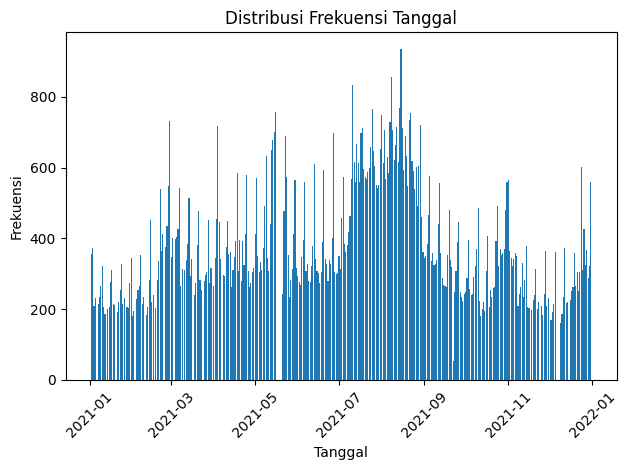

In [ ]:
plt.bar(frequency_distribution['Tanggal'], frequency_distribution['Frekuensi'])
plt.xlabel('Tanggal')
plt.ylabel('Frekuensi')
plt.title('Distribusi Frekuensi Tanggal')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
mean_no_transaksi = df['No_Transaksi'].mean()
std_no_transaksi = df['No_Transaksi'].std()

percentiles_no_transaksi = np.percentile(df['No_Transaksi'], [10, 25, 50, 75, 90])

frequency_distribution_no_transaksi = pd.DataFrame(df['No_Transaksi'].value_counts().reset_index())
frequency_distribution_no_transaksi.columns = ['No_Transaksi', 'Frekuensi']

min_no_transaksi = df['No_Transaksi'].min()
max_no_transaksi = df['No_Transaksi'].max()

print(f"Rata-Rata No_Transaksi: {mean_no_transaksi}")
print(f"Standar Deviasi No_Transaksi: {std_no_transaksi}")

print(f"\nNilai Minimum No Transaksi: {min_no_transaksi}")
print(f"Nilai Maksimum No Transaksi: {max_no_transaksi}")

print("\nPersentil No_Transaksi:")
print(f"  10%: {percentiles_no_transaksi[0]}")
print(f"  25%: {percentiles_no_transaksi[1]}")
print(f"  50%: {percentiles_no_transaksi[2]}")
print(f"  75%: {percentiles_no_transaksi[3]}")
print(f"  90%: {percentiles_no_transaksi[4]}")

Rata-Rata No_Transaksi: 188726.30739846895
Standar Deviasi No_Transaksi: 22194.666977343422

Nilai Minimum No Transaksi: 150040
Nilai Maksimum No Transaksi: 227279

Persentil No_Transaksi:
  10%: 157945.7
  25%: 169638.75
  50%: 188847.0
  75%: 207645.0
  90%: 219537.3


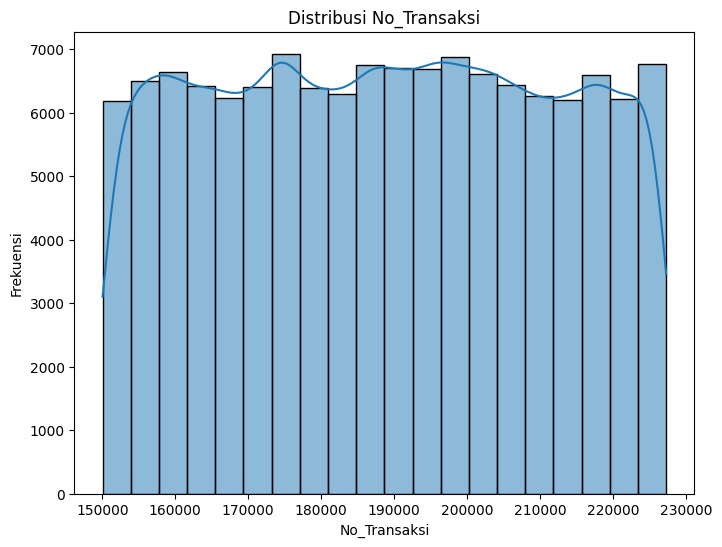

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['No_Transaksi'], bins=20, kde=True)
plt.title('Distribusi No_Transaksi')
plt.xlabel('No_Transaksi')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
frequency_distribution_menu = pd.DataFrame(df['Menu'].value_counts().reset_index())
frequency_distribution_menu.columns = ['Menu', 'Frekuensi']

print("\nDistribusi Frekuensi Menu:")
print(frequency_distribution_menu)


Distribusi Frekuensi Menu:
                         Menu  Frekuensi
0        TRADITIONAL BAGUETTE      37210
1                       COUPE      11176
2                    BAGUETTE       8679
3                     BANETTE       8522
4                   CROISSANT       6254
5            PAIN AU CHOCOLAT       5714
6             CEREAL BAGUETTE       3045
7               SPECIAL BREAD       2917
8                    CAMPAGNE       2278
9                  BOULE 400G       2266
10           FORMULE SANDWICH       2201
11                    COMPLET       1775
12                    MOISSON       1764
13                  VIK BREAD       1762
14                 TARTELETTE       1597
15               PAIN BANETTE       1595
16                    FICELLE       1567
17                  BANETTINE       1492
18                 BOULE 200G       1353
19           SANDWICH COMPLET       1194
20                     ECLAIR       1176
21           PAIN AUX RAISINS       1144
22                     COOKIE

In [ ]:
fig = px.treemap(data_frame=frequency_distribution_menu,
                path=[px.Constant('<b> Semua Menu'), 'Menu'],
                title='<b> Distribusi Frekuensi Menu',
                values='Frekuensi')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')

fig.update_layout(treemapcolorway=['pink', 'blue'],
                  margin=dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

In [ ]:
mean_kuantitas = df['Kuantitas'].mean()
std_kuantitas = df['Kuantitas'].std()

percentiles_kuantitas = np.percentile(df['Kuantitas'], [10, 25, 50, 75, 90])

frequency_distribution_kuantitas = pd.DataFrame(df['Kuantitas'].value_counts().reset_index())
frequency_distribution_kuantitas.columns = ['Kuantitas', 'Frekuensi']

min_kuantitas = df['Kuantitas'].min()
max_kuantitas = df['Kuantitas'].max()

print(f"Rata-Rata Kuantitas: {mean_kuantitas}")
print(f"Standar Deviasi Kuantitas: {std_kuantitas}")

print(f"\nNilai Minimum Kuantitas: {min_kuantitas}")
print(f"Nilai Maksimum Kuantitas: {max_kuantitas}")

print("\nPersentil Kuantitas:")
print(f"  10%: {percentiles_kuantitas[0]}")
print(f"  25%: {percentiles_kuantitas[1]}")
print(f"  50%: {percentiles_kuantitas[2]}")
print(f"  75%: {percentiles_kuantitas[3]}")
print(f"  90%: {percentiles_kuantitas[4]}")

print("\nDistribusi Frekuensi Kuantitas:")
print(frequency_distribution_kuantitas)

Rata-Rata Kuantitas: 1.5643772865619332
Standar Deviasi Kuantitas: 1.2608046442163279

Nilai Minimum Kuantitas: 1
Nilai Maksimum Kuantitas: 200

Persentil Kuantitas:
  10%: 1.0
  25%: 1.0
  50%: 1.0
  75%: 2.0
  90%: 3.0

Distribusi Frekuensi Kuantitas:
    Kuantitas  Frekuensi
0           1      87017
1           2      28031
2           3       7630
3           4       4123
4           5       1595
5           6        854
6           7        275
7           8        254
8          10        196
9           9         36
10         12         30
11         20         15
12         11         12
13         15          8
14         25          7
15         14          6
16         18          5
17         13          4
18         17          4
19         21          2
20        200          1
21         55          1
22         43          1
23         16          1


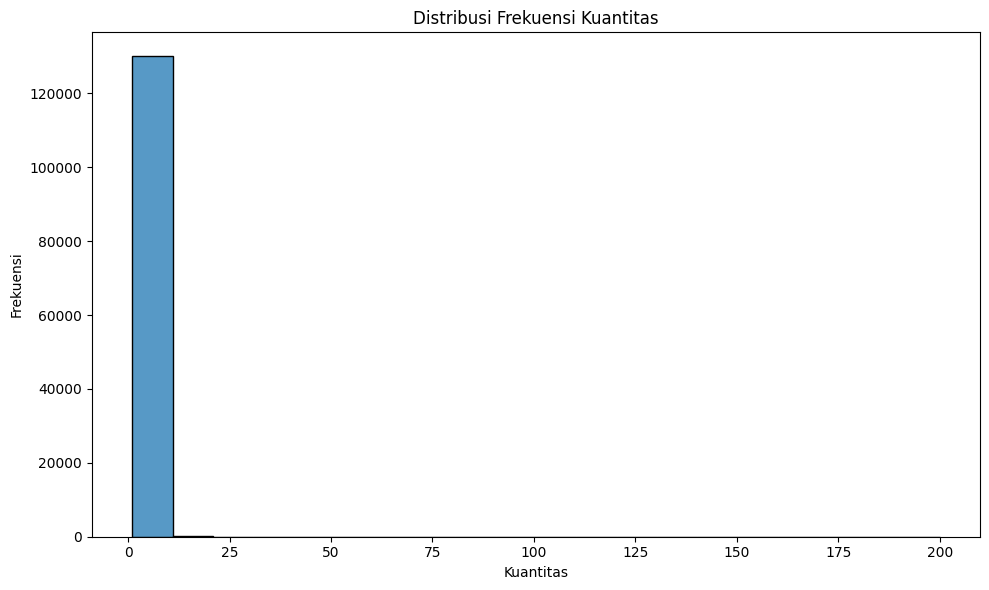

In [ ]:
frequency_distribution_kuantitas = pd.DataFrame(df['Kuantitas'].value_counts().reset_index())
frequency_distribution_kuantitas.columns = ['Kuantitas', 'Frekuensi']

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Kuantitas", bins=20)
plt.title('Distribusi Frekuensi Kuantitas')
plt.xlabel('Kuantitas')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

In [ ]:
mean_harga_item = df['Harga/Item'].mean()
std_harga_item = df['Harga/Item'].std()

percentiles_harga_item = np.percentile(df['Harga/Item'], [10, 25, 50, 75, 90])

frequency_distribution_harga_item = pd.DataFrame(df['Harga/Item'].value_counts().reset_index())
frequency_distribution_harga_item.columns = ['Harga/Item', 'Frekuensi']

min_harga_item = df['Harga/Item'].min()
max_harga_item = df['Harga/Item'].max()

print(f"Rata-Rata Harga/Item: {mean_harga_item}")
print(f"Standar Deviasi Harga/Item: {std_harga_item}")

print(f"\nNilai Minimum Harga/Item: {min_harga_item}")
print(f"Nilai Maksimum Harga/Item: {max_harga_item}")

print("\nPersentil Harga/Item:")
print(f"  10%: {percentiles_harga_item[0]}")
print(f"  25%: {percentiles_harga_item[1]}")
print(f"  50%: {percentiles_harga_item[2]}")
print(f"  75%: {percentiles_harga_item[3]}")
print(f"  90%: {percentiles_harga_item[4]}")

print("\nDistribusi Frekuensi Harga/Item:")
print(frequency_distribution_harga_item)

Rata-Rata Harga/Item: 1.6037385864051403
Standar Deviasi Harga/Item: 1.6335578188633602

Nilai Minimum Harga/Item: 0.07
Nilai Maksimum Harga/Item: 44.0

Persentil Harga/Item:
  10%: 0.6
  25%: 1.05
  50%: 1.2
  75%: 1.5
  90%: 2.5

Distribusi Frekuensi Harga/Item:
    Harga/Item  Frekuensi
0         1.20      42939
1         0.15      11176
2         0.90       8679
3         1.05       8522
4         1.10       7790
5         2.00       6927
6         1.50       5812
7         1.40       4545
8         0.60       3217
9         1.80       3050
10        1.25       3045
11        2.40       2941
12        2.50       2781
13        1.00       2762
14        6.50       2290
15        3.00       1663
16        4.50       1245
17        5.00       1120
18        7.00       1097
19        1.15       1077
20        2.10       1058
21        1.30        964
22        3.50        871
23        0.45        625
24        7.50        532
25        1.60        420
26        4.00        407
27     

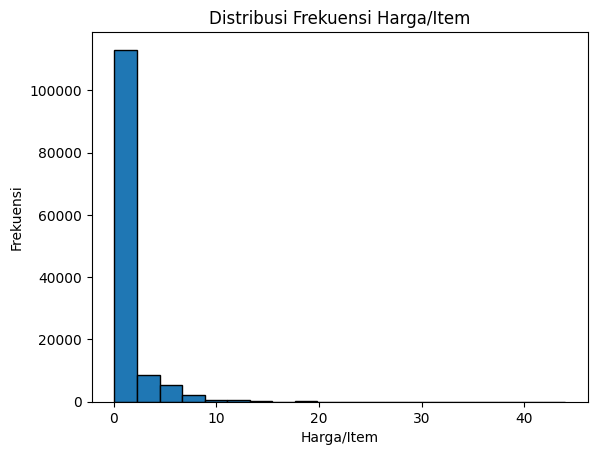

In [ ]:
plt.hist(df['Harga/Item'], bins=20, edgecolor='black')

plt.title('Distribusi Frekuensi Harga/Item')
plt.xlabel('Harga/Item')
plt.ylabel('Frekuensi')

plt.show()

In [ ]:
mean_pendapatan = df['Pendapatan'].mean()
std_pendapatan = df['Pendapatan'].std()

percentiles_pendapatan = np.percentile(df['Pendapatan'], [10, 25, 50, 75, 90])

frequency_distribution_pendapatan = pd.DataFrame(df['Pendapatan'].value_counts().reset_index())
frequency_distribution_pendapatan.columns = ['Pendapatan', 'Frekuensi']

min_pendapatan = df['Pendapatan'].min()
max_pendapatan = df['Pendapatan'].max()

print(f"Rata-Rata Pendapatan: {mean_pendapatan}")
print(f"Standar Deviasi Pendapatan: {std_pendapatan}")

print(f"\nNilai Minimum Pendapatan: {min_pendapatan}")
print(f"Nilai Maksimum Pendapatan: {max_pendapatan}")

print("\nPersentil Pendapatan:")
print(f"  10%: {percentiles_pendapatan[0]}")
print(f"  25%: {percentiles_pendapatan[1]}")
print(f"  50%: {percentiles_pendapatan[2]}")
print(f"  75%: {percentiles_pendapatan[3]}")
print(f"  90%: {percentiles_pendapatan[4]}")

print("\nDistribusi Frekuensi Pendapatan:")
print(frequency_distribution_pendapatan)

Rata-Rata Pendapatan: 2.348034479048175
Standar Deviasi Pendapatan: 2.5071319995227688

Nilai Minimum Pendapatan: 0.07
Nilai Maksimum Pendapatan: 200.0

Persentil Pendapatan:
  10%: 0.6
  25%: 1.2
  50%: 1.5
  75%: 2.5
  90%: 4.8

Distribusi Frekuensi Pendapatan:
     Pendapatan  Frekuensi
0          1.20      22412
1          2.40      15783
2          0.15       9784
3          0.90       6278
4          1.05       5573
5          2.00       5356
6          1.50       4868
7          1.80       4372
8          3.60       4151
9          1.40       3502
10         1.10       3185
11         2.50       2943
12         0.60       2818
13         2.10       2706
14         4.80       2566
15         4.00       2246
16         3.00       2196
17         2.20       2159
18         1.25       2053
19         6.00       1929
20         6.50       1802
21         1.00       1656
22         5.00       1560
23         0.30       1218
24         7.00       1164
25         4.50       1161
26     

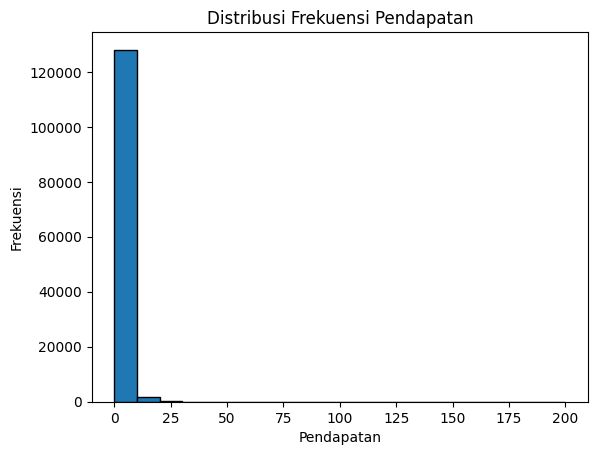

In [ ]:
plt.hist(df['Pendapatan'], bins=20, edgecolor='black')

plt.title('Distribusi Frekuensi Pendapatan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')

plt.show()

In [ ]:
frequency_distribution_bulan = pd.DataFrame(df['Bulan'].value_counts().reset_index())
frequency_distribution_bulan.columns = ['Bulan', 'Frekuensi']

mode_bulan = df['Bulan'].mode()[0]

print("\nDistribusi Frekuensi Bulan:")
print(frequency_distribution_bulan)


Distribusi Frekuensi Bulan:
   Bulan  Frekuensi
0    Aug      20136
1    Jul      17429
2    May      12118
3    Jun      10786
4    Apr      10769
5    Sep      10141
6    Oct       9786
7    Mar       9122
8    Nov       7835
9    Dec       7759
10   Feb       7737
11   Jan       6490


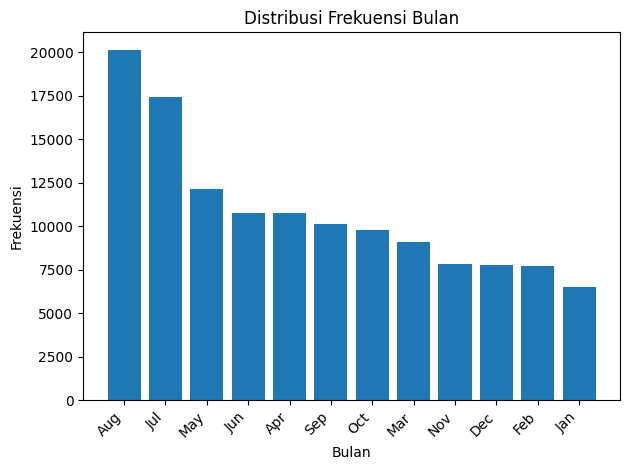

In [ ]:
bulan = frequency_distribution_bulan['Bulan']
frekuensi = frequency_distribution_bulan['Frekuensi']

plt.bar(bulan, frekuensi)

plt.title('Distribusi Frekuensi Bulan')
plt.xlabel('Bulan')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
frequency_distribution_hari = pd.DataFrame(df['Hari'].value_counts().reset_index())
frequency_distribution_hari.columns = ['Hari', 'Frekuensi']

mode_hari = df['Hari'].mode()[0]

print("\nDistribusi Frekuensi Hari:")
print(frequency_distribution_hari)


Distribusi Frekuensi Hari:
  Hari  Frekuensi
0  Sun      27985
1  Sat      21558
2  Fri      18092
3  Mon      17439
4  Thu      16912
5  Tue      16833
6  Wed      11289


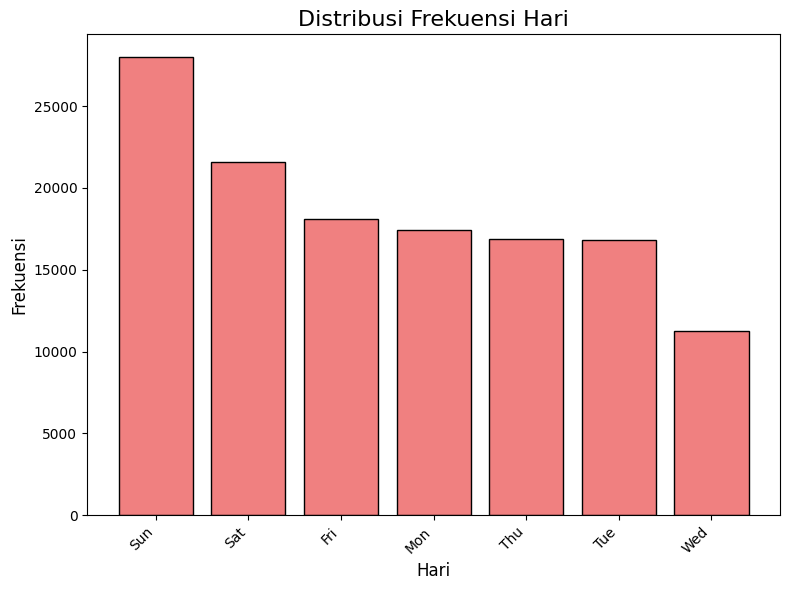

In [ ]:
frequency_distribution_hari = pd.DataFrame(df['Hari'].value_counts().reset_index())
frequency_distribution_hari.columns = ['Hari', 'Frekuensi']

hari = frequency_distribution_hari['Hari']
frekuensi = frequency_distribution_hari['Frekuensi']

plt.figure(figsize=(8, 6))
plt.bar(hari, frekuensi, color='lightcoral', edgecolor='black')

plt.title('Distribusi Frekuensi Hari', fontsize=16)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.show()

## **Visualisasi Data**

In [ ]:
fig = px.treemap(data_frame=df,
                path=[px.Constant('<b> Menu Items'),
                      'Menu'],
                title = '<b> Menu Item Terlaris',
                values= 'Kuantitas')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')

fig.update_layout(treemapcolorway = ['burlywood', 'cadetblue'],
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

In [ ]:
fig = px.treemap(data_frame=df,
                path=[px.Constant('<b> Menu Items'),
                      'Menu'],
                title = '<b> Menu Item dengan Pendapatan Tertinggi',
                values='Pendapatan')

fig.data[0].textinfo = 'label+text+value'

fig.update_traces(root_color='lightgrey')

fig.update_layout(treemapcolorway = ['slateblue', 'peachpuff'],
                  margin = dict(t=50, l=20, r=20, b=20))

fig.layout.hovermode = False
fig.show()

In [ ]:
profitable_menu = df.groupby('Bulan').sum(numeric_only=True)['Pendapatan'].sort_values(ascending=False)

fig = px.bar(profitable_menu,
             color=profitable_menu,
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Total Pendapatan/Bulan', title_x = 0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True,
                 title='<b> Bulan')
fig.update_xaxes(title='<b> Pendapatan')
fig.update_traces(texttemplate='%{y}',
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

In [ ]:
weekly_revenue = df.groupby(df['Tanggal'].dt.isocalendar().week)['Pendapatan'].sum().reset_index()
weekly_revenue.columns = ['Minggu', 'Pendapatan']

fig = px.bar(weekly_revenue,
             x='Minggu',
             y='Pendapatan',
             color='Pendapatan',
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Total Pendapatan/Minggu', title_x=0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis={'categoryorder': 'total ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True, title='<b> Pendapatan')
fig.update_xaxes(title='<b> Minggu ke-')

fig.update_traces(texttemplate='%{y}',
                  textposition='inside',
                  hovertemplate='<b>Minggu %{x}</b><br>Pendapatan: %{y}')

fig.show()

In [ ]:
profitable_menu = df.groupby('Hari').sum(numeric_only=True)['Pendapatan'].sort_values(ascending=False)

fig = px.bar(profitable_menu,
             color=profitable_menu,
             color_continuous_scale=px.colors.sequential.YlGnBu)

fig.update_layout(margin=dict(t=70, b=10, l=20, r=20),
                  title='<b> Total Pendapatan/Hari', title_x = 0.5,
                  titlefont=dict(size=20),
                  xaxis_tickangle=-0,
                  yaxis = {'categoryorder':'total ascending'},
                  plot_bgcolor='white',
                  coloraxis_showscale=False)

fig.update_yaxes(showticklabels=True,
                 title='<b> Hari')
fig.update_xaxes(title='<b> Pendapatan')
fig.update_traces(texttemplate='%{y}',
                  textposition='inside',
                  hovertemplate = '<b>%{x}</b><br>Revenue: %{y}')
fig.show()

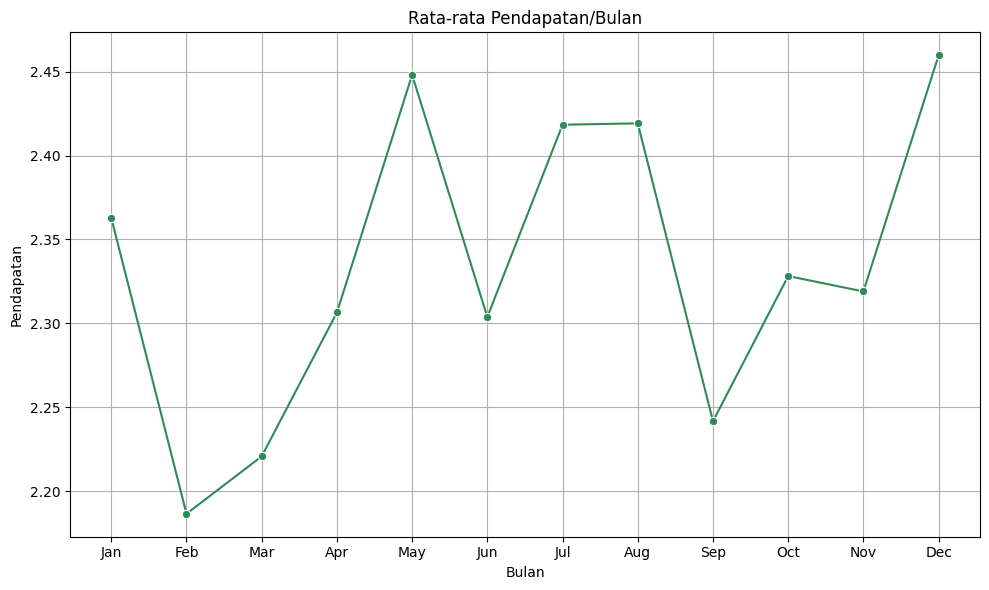

In [ ]:
monthly_revenue = df.groupby('Bulan')['Pendapatan'].mean().reset_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_revenue['Bulan'] = pd.Categorical(monthly_revenue['Bulan'], categories=month_order, ordered=True)
monthly_revenue = monthly_revenue.sort_values('Bulan')

plt.figure(figsize=(10, 6))
sns.lineplot(x='Bulan', y='Pendapatan', data=monthly_revenue, marker='o', color='seagreen')
plt.title('Rata-rata Pendapatan/Bulan')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.tight_layout()
plt.show()

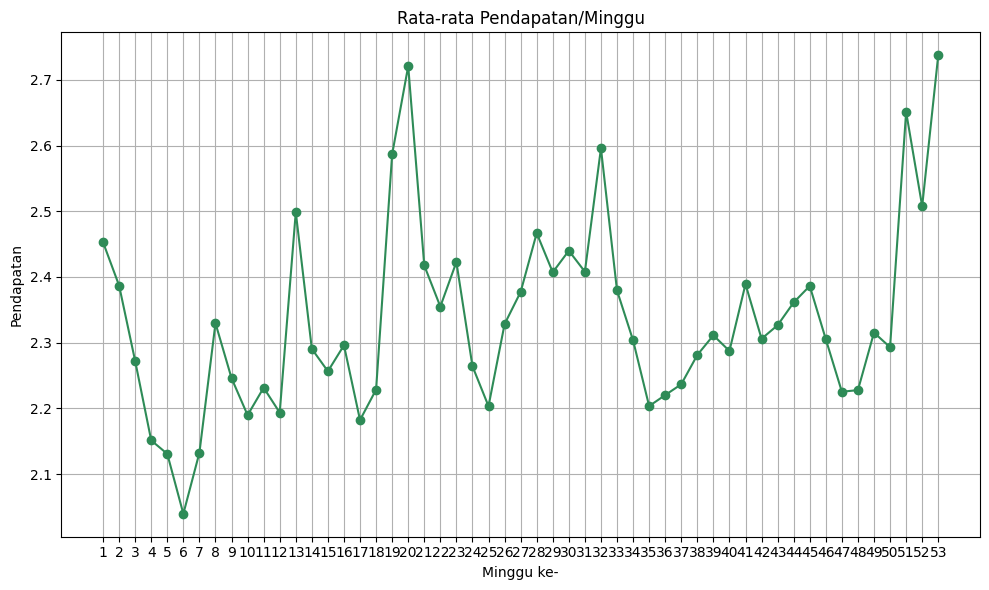

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

weekly_revenue = df.groupby(df['Tanggal'].dt.isocalendar().week)['Pendapatan'].mean().reset_index()

weekly_revenue.columns = ['Minggu', 'Pendapatan']

plt.figure(figsize=(10, 6))
plt.plot(weekly_revenue['Minggu'], weekly_revenue['Pendapatan'], marker='o', linestyle='-', color='seagreen')
plt.title('Rata-rata Pendapatan/Minggu')
plt.xlabel('Minggu ke-')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.xticks(weekly_revenue['Minggu'])
plt.tight_layout()
plt.show()

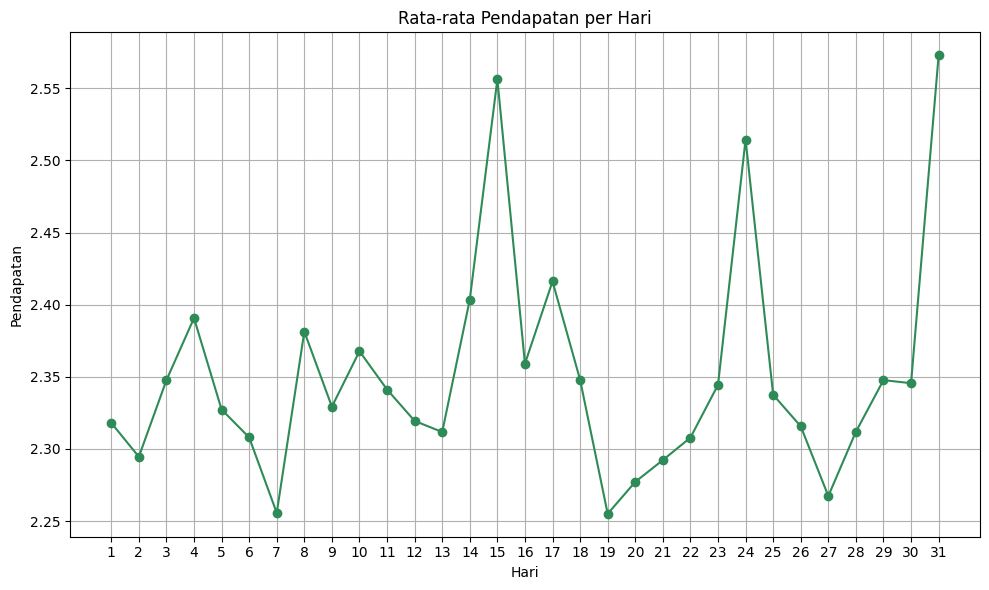

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

daily_revenue = df.groupby(df['Tanggal'].dt.day)['Pendapatan'].mean().reset_index()

daily_revenue.columns = ['Hari', 'Pendapatan']

plt.figure(figsize=(10, 6))
plt.plot(daily_revenue['Hari'], daily_revenue['Pendapatan'], marker='o', linestyle='-', color='seagreen')
plt.title('Rata-rata Pendapatan per Hari')
plt.xlabel('Hari')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.xticks(daily_revenue['Hari'])
plt.tight_layout()
plt.show()

## **Korelasi Data**

In [ ]:
correlation_matrix = df[['Kuantitas', 'Harga/Item', 'Pendapatan']].corr()

print(correlation_matrix)

            Kuantitas  Harga/Item  Pendapatan
Kuantitas    1.000000   -0.078083    0.550038
Harga/Item  -0.078083    1.000000    0.705979
Pendapatan   0.550038    0.705979    1.000000


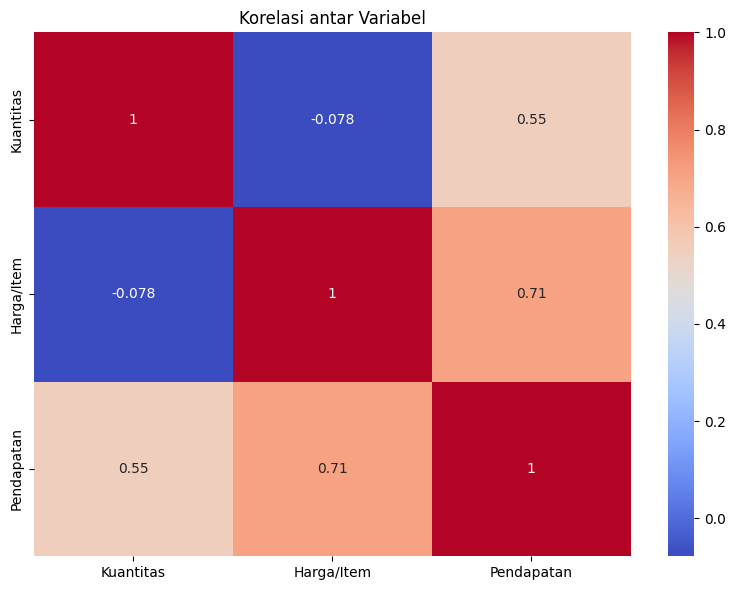

In [ ]:
correlation_matrix = df[['Kuantitas', 'Harga/Item', 'Pendapatan']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antar Variabel')
plt.tight_layout()
plt.show()

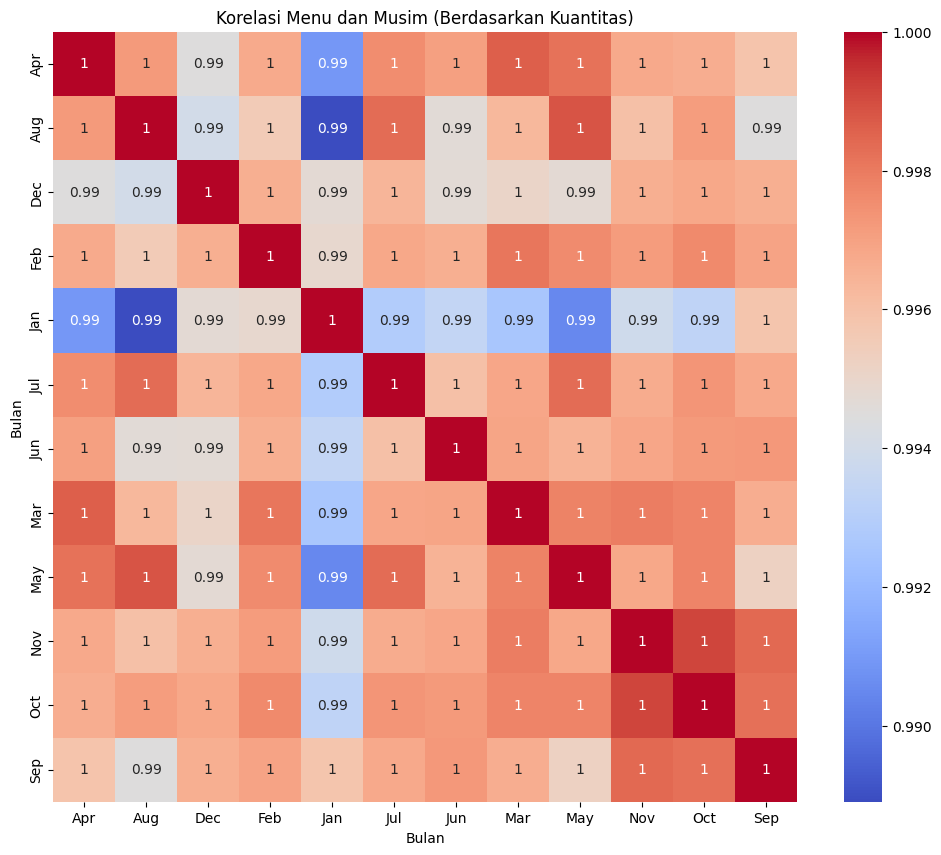

In [ ]:
menu_season_data = df.groupby(['Menu', 'Bulan'])['Kuantitas'].sum().reset_index()
menu_season_pivot = menu_season_data.pivot_table(index='Menu', columns='Bulan', values='Kuantitas', fill_value=0)

menu_season_corr = menu_season_pivot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(menu_season_corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Menu dan Musim (Berdasarkan Kuantitas)')
plt.show()

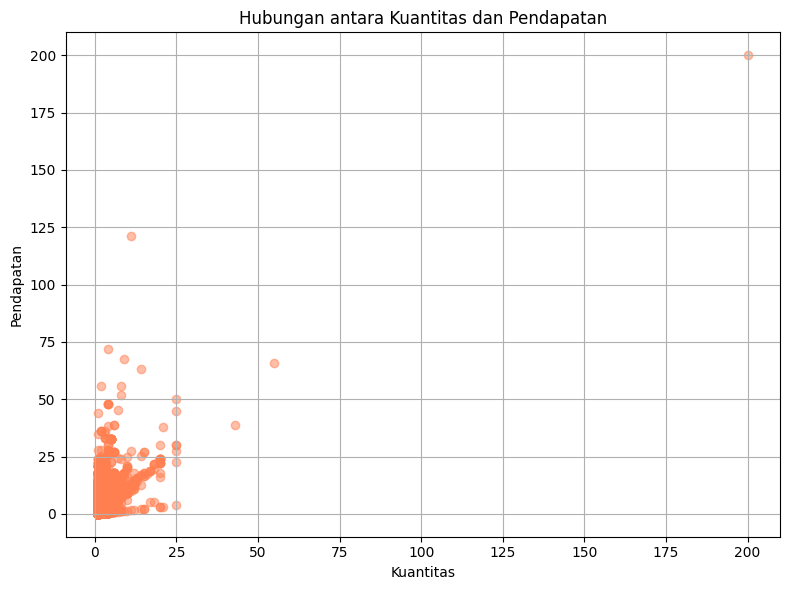

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Kuantitas'], df['Pendapatan'], alpha=0.5, color='coral')
plt.title('Hubungan antara Kuantitas dan Pendapatan')
plt.xlabel('Kuantitas')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['Bulan_Hari'] = df['Bulan'] + ' - ' + df['Hari']

fig = px.sunburst(df, path=['Bulan', 'Hari'], values='Pendapatan',
                  title='Hubungan Pendapatan per-Hari dan per-Bulan')
fig.show()